# Predictive Modeling of Car Prices Using Machine Learning

## Objective:
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.


## Loading and Preprocessing

In [134]:
#  Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [111]:
# loading dataset
df=pd.read_csv("CarPrice_Assignment.csv")

In [112]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [113]:
# Display basic information
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [114]:
# Check for null values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [115]:
# Checking  datatypes
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [116]:
# Drop car_ID as it's just a unique identifier
df.drop(columns=['car_ID'], inplace=True)

In [117]:
# Extracting car brand from 'CarName'
df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0].lower())

In [118]:
# Display unique values for each column
for column in df.columns:
    unique_vals = df[column].unique()
    print(f"\n🔹 {column} - {len(unique_vals)} unique values:")
    print(unique_vals)



🔹 symboling - 6 unique values:
[ 3  1  2  0 -1 -2]

🔹 CarName - 147 unique values:
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 cu

In [119]:
# Fixing typos in car brand names
df['CarBrand'] = df['CarBrand'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'nissan': 'nissan',
    'maxda': 'mazda'
})

# Drop original CarName column
df.drop(columns=['CarName'], inplace=True)
#df.drop(columns=['car_ID'], inplace=True)

## Encoding Categorical Columns

In [120]:
df_copy  = df.copy()
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols.tolist())

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Categorical columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']


In [121]:
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,False,False,False,False,False,False,False,False,False,True
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,False,False,False,False,False,False,False,False,False,True
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,False,False,False,False,False,False,False,False,False,True
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,False,False,False,False,False,False,False,False,False,True


## Oulier detection

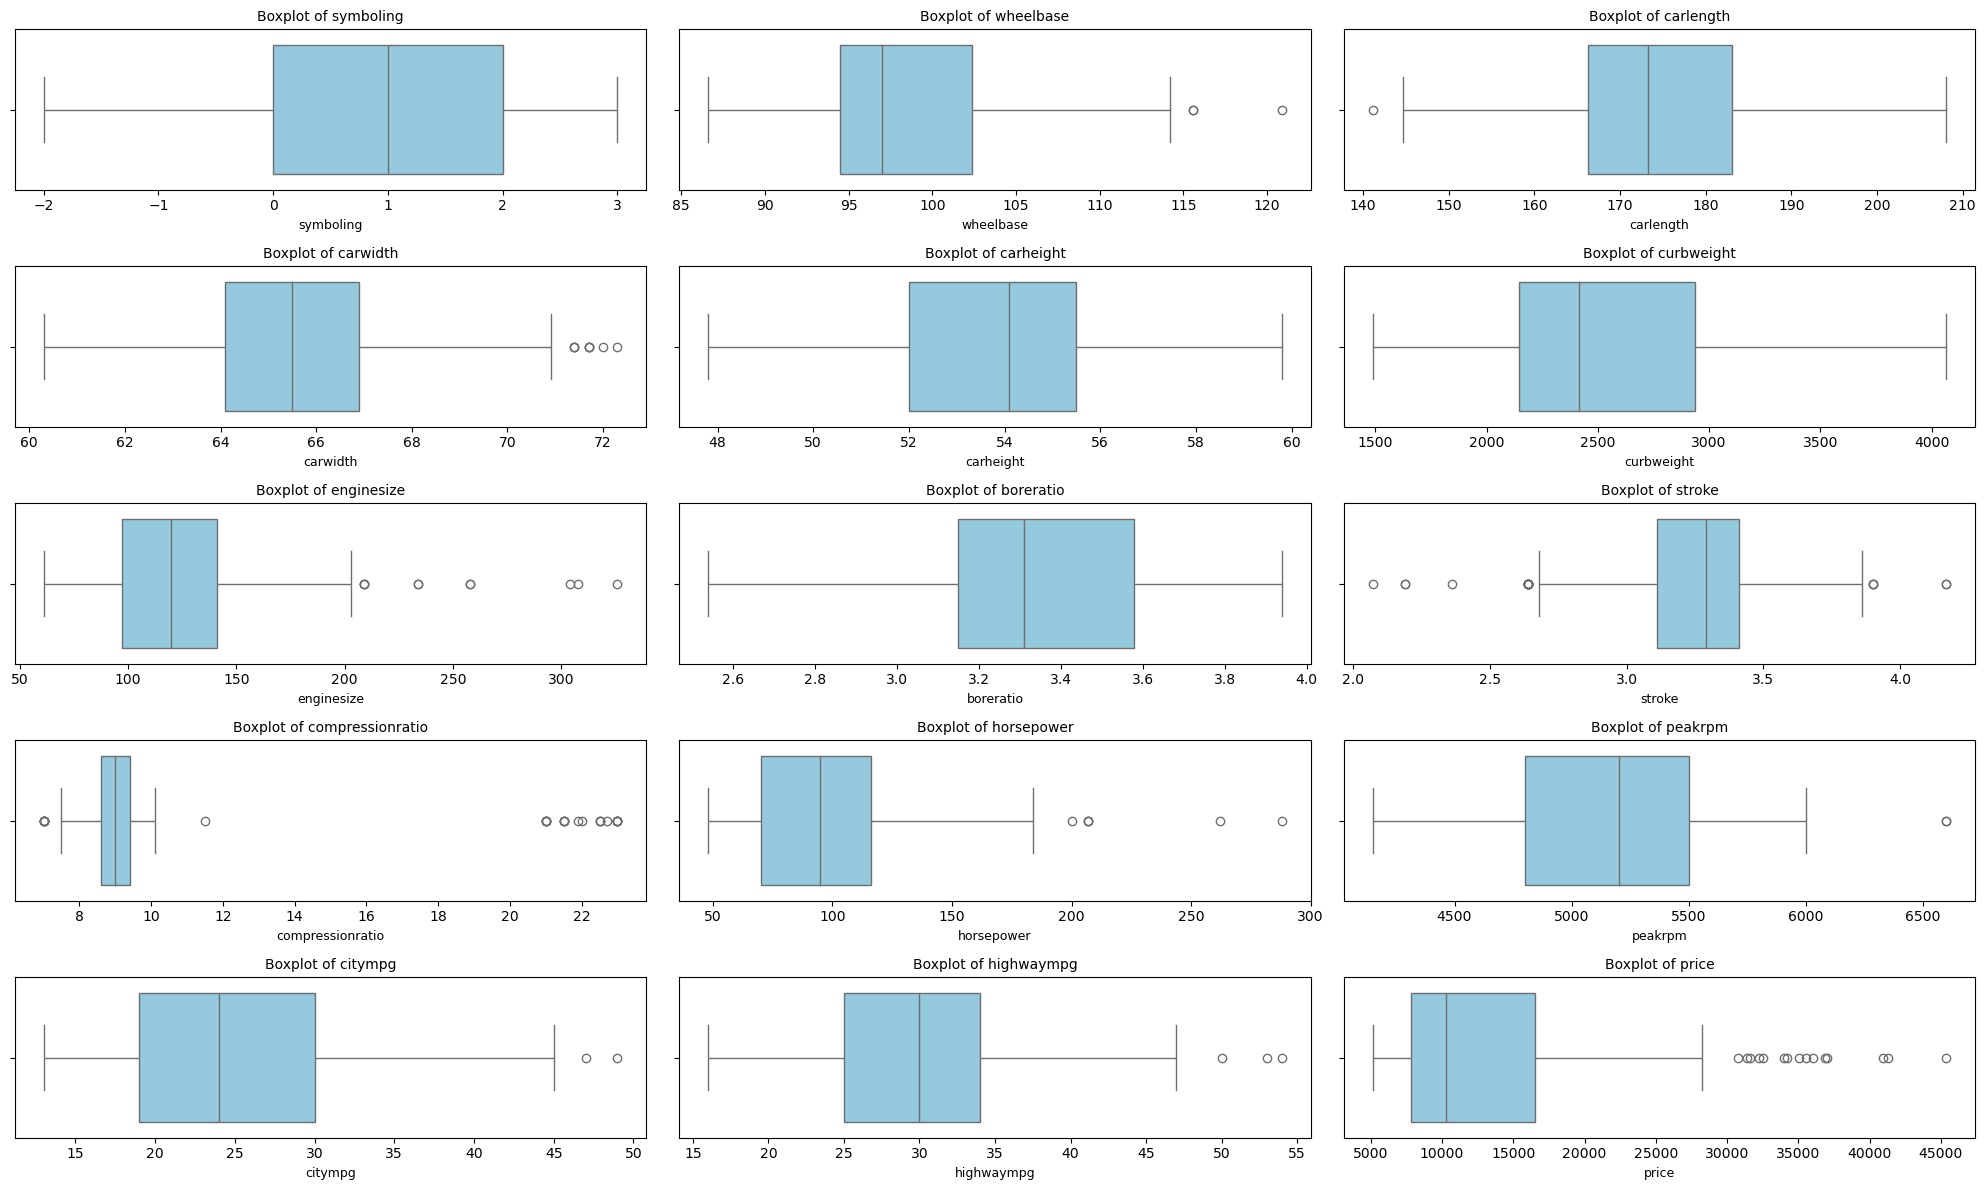

In [122]:
# Set plot size
plt.figure(figsize=(20, 12))

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.xlabel(col, fontsize=9)

plt.tight_layout()
plt.show()


 Checking Price Distribution for Luxury Cars

Before handling outliers, it's important to verify whether high-priced entries represent genuine luxury car. We will inspect the prices of luxury brands in the dataset.


In [123]:
df_copy[['CarBrand', 'price']].sort_values(by='price', ascending=False).head(10)

,CarBrand,price
74,buick,45400.0
16,bmw,41315.0
73,buick,40960.0
128,porsche,37028.0
17,bmw,36880.0
49,jaguar,36000.0
48,jaguar,35550.0
72,buick,35056.0
71,buick,34184.0
127,porsche,34028.0


In [124]:
df_copy[['CarBrand','price']]

,CarBrand,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
...,...,...
200,volvo,16845.0
201,volvo,19045.0
202,volvo,21485.0
203,volvo,22470.0


That the high-priced entries belong to genuine luxury brands and their features (e.g., horsepower, engine size) support this — then we  keep those records.

In [125]:
# Convert boolean columns to integers (0/1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [126]:
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,0,0,1
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,0,0,1
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,0,0,0,0,1


## Train - Test Split

In [127]:
# Separate the input features (X) from the target variable (y) — that is  the price.

X = df.drop('price', axis=1)
y = df['price']


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Feature Scaling 

In [129]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Implementation

In [130]:
# Creating a dictionary to store the results
results = {}

# machine learning models
models = {
    'Linear Regression':LinearRegression(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(random_state = 42),
    'Gradient Boosting Regressor':GradientBoostingRegressor(random_state = 42),
    'SVR':SVR()
}

In [131]:
# Model Evaluation
for name,models in models.items():
    models.fit(X_train_scaled,y_train)
    y_pred = models.predict(X_test_scaled)
    results[name] = {
        'R-squared':r2_score(y_test,y_pred),
        'MAE':mean_absolute_error(y_test,y_pred),
        'MSE':mean_squared_error(y_test,y_pred)
    }


# Convert results to DataFrame
results_df = pd.DataFrame(results).T
display(results_df.sort_values(by='R-squared', ascending=False))


,R-squared,MAE,MSE
Random Forest Regressor,9.585720e-01,1.287079e+03,3.270490e+06
Gradient Boosting Regressor,9.241813e-01,1.710336e+03,5.985429e+06
Decision Tree Regressor,8.865943e-01,1.970289e+03,8.952702e+06
SVR,-1.006462e-01,5.701536e+03,8.688943e+07
Linear Regression,-1.691816e+23,5.707478e+14,1.335587e+31


# Feature Importance Analysis 

In [132]:
# Use feature importances from the best model: Gradient Boosting
best_model = RandomForestRegressor(random_state=42)	
best_model.fit(X_train_scaled,y_train)

# Feature importance
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False).head(10)
importances_sorted

enginesize      0.544159
curbweight      0.298449
highwaympg      0.044743
horsepower      0.033483
carwidth        0.013090
carlength       0.007767
CarBrand_bmw    0.007114
wheelbase       0.006991
citympg         0.006420
peakrpm         0.006174
dtype: float64

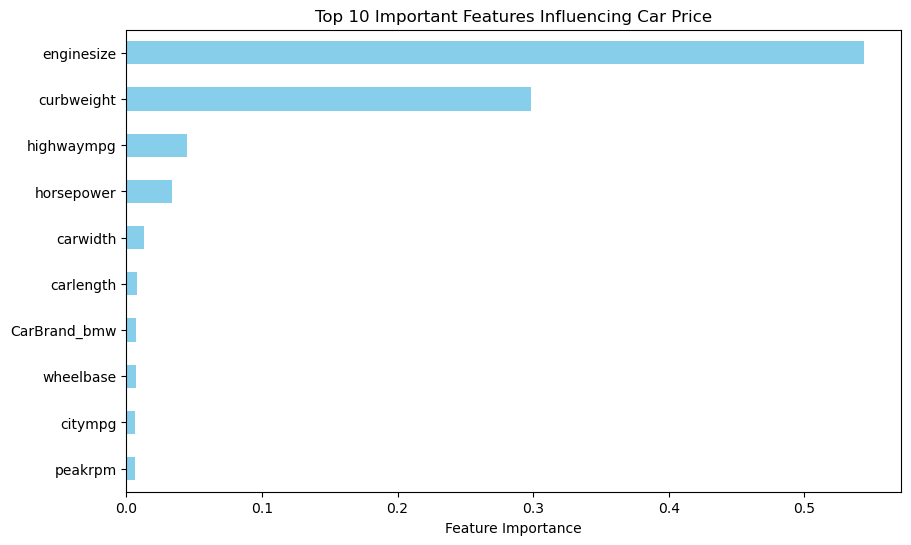

In [133]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
importances_sorted.plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features Influencing Car Price")
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.show()

#  Hyperparameter Tuning with GridSearchCV


In [138]:
param_grid = {
    'n_estimators': [100, 200, 300,800],
    'max_depth': [None, 10, 20, 30,60],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print("\n Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\prave\anaconda3\anaconda3_1\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



 Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


In [139]:
#  Model After Tuning

best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test_scaled)

tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_mse = mean_squared_error(y_test, y_pred_tuned)

print("\n Tuned Random Forest Performance:")
print(f"R² Score: {tuned_r2:.6f}")
print(f"MAE: {tuned_mae:.6f}")
print(f"MSE: {tuned_mse:.6f}")



 Tuned Random Forest Performance:
R² Score: 0.958886
MAE: 1236.656643
MSE: 3245687.196967
